# Cell Segmentation

This notebook segments cells from a fluorescence microscopy image showing cell membranes.

## Import required libraries

In [1]:
import numpy as np
from skimage.io import imread, imsave
import napari_segment_blobs_and_things_with_membranes as nsbatwm
import stackview

/opt/hostedtoolcache/Python/3.12.8/x64/lib/python3.12/site-packages/napari_tools_menu/__init__.py:10: UserWarning: Importing QT failed; now introducing dummy definitions of QMenu class and register_function decorator.
  warnings.warn("Importing QT failed; now introducing dummy definitions of QMenu class and register_function decorator.")


## Create a sample input image

In [2]:
# Create a sample 100x100 image with some circular membranes
image = np.zeros((100, 100))
from skimage.draw import disk
for i, center in enumerate([(30, 30), (60, 60), (30, 60), (60, 30)]):
    rr, cc = disk(center, 15)
    image[rr, cc] = 255

stackview.insight(image)
imsave('input.png', image.astype(np.uint8))

## Segment cells using watershed

Since we have membrane staining, we'll use local minima seeded watershed segmentation


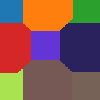

In [3]:
labels = nsbatwm.local_minima_seeded_watershed(image, spot_sigma=10, outline_sigma=2)
stackview.insight(labels)
stackview.animate_curtain(image, labels)

## Save results

In [4]:
from skimage import color
rgb_labels = (color.label2rgb(labels, bg_label=0, kind='overlay')*255).astype('uint8')
imsave('segmentation_result.png', rgb_labels)